# Computation on Arrays: Broadcasting

## Introducing Broadcasting

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

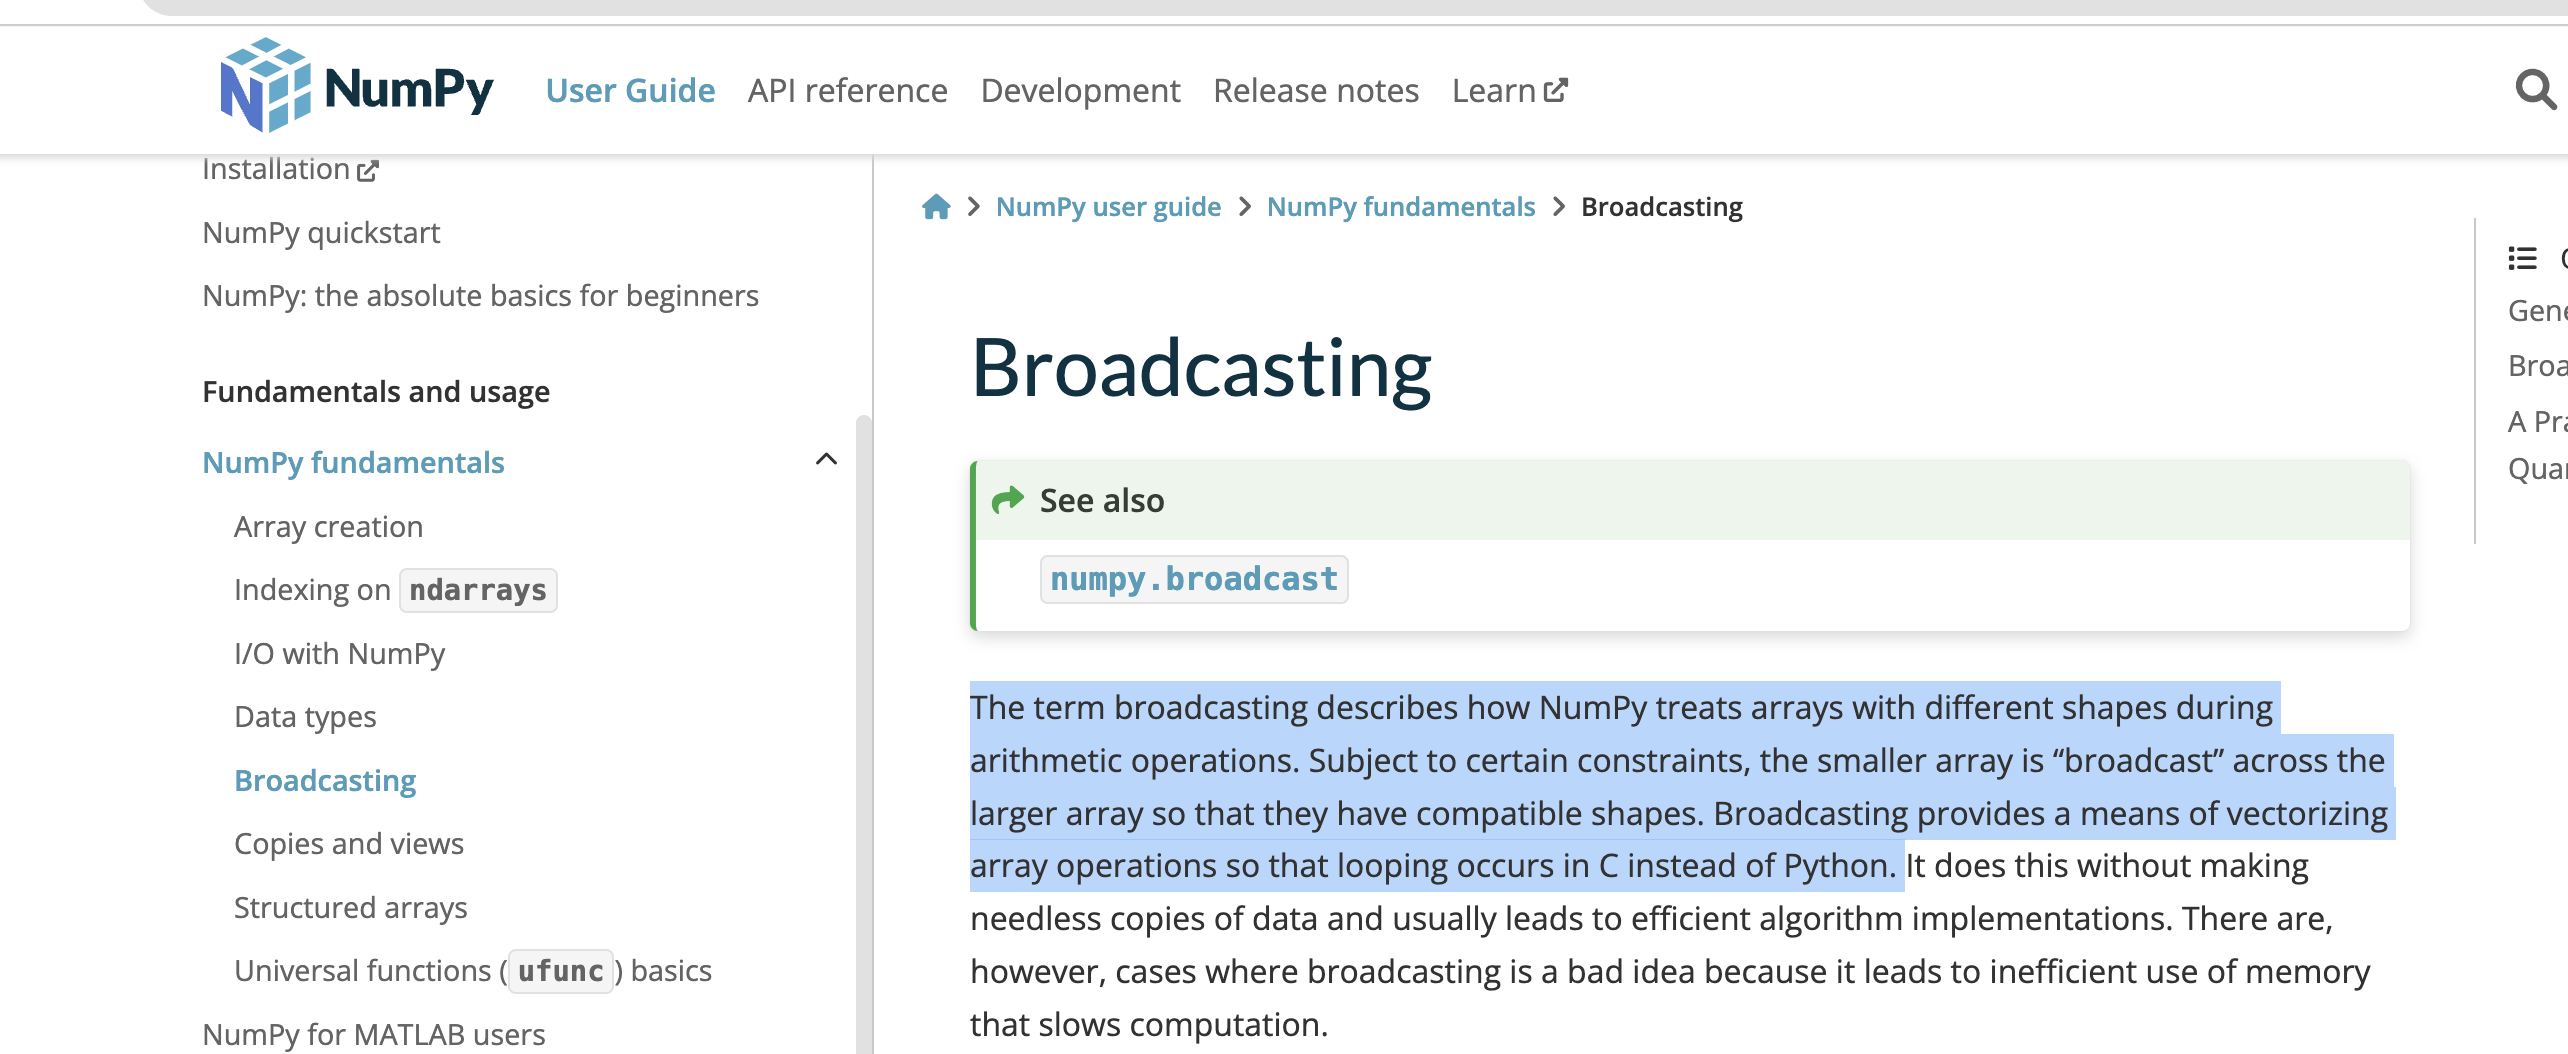

In [76]:
import numpy as np

In [77]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [78]:
a + 5

array([5, 6, 7])

In [79]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [80]:
a

array([0, 1, 2])

In [81]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [82]:
#broadcasting 1X3 to 3 X1 matrices. Both are augmented and then element wise added 

a = np.array([[0 , 1, 2]])

b = np.array([[0],
              [1],
              [2]
             ])

print(a)
print(a.shape)
print(b)
print(b.shape)

[[0 1 2]]
(1, 3)
[[0]
 [1]
 [2]]
(3, 1)


In [83]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [46]:
M = np.ones((2, 3))
a = np.arange(3)

In [47]:
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [48]:
a

array([0, 1, 2])

In [49]:
M.shape

(2, 3)

In [50]:
a.shape

(3,)

In [51]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [53]:
(M+a).shape

(2, 3)

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [54]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [55]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [56]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [57]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [58]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [59]:
a[:, np.newaxis].shape

(3, 1)

In [60]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

Also note that while we've been focusing on the ``+`` operator here, these broadcasting rules apply to *any* binary ``ufunc``.
For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [61]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

Broadcasting operations form the core of many examples we'll see throughout this book.
We'll now take a look at a couple simple examples of where they can be useful.

### Centering an array

#### How Vectorization and Broadcasting helps.

#### Why Numpy vectorization and broadcasting is important 


one of the common requirement is standardization to bring all features on common scale. What we do is zero center all elements by subtracting mean and then divide by std deviation. Imagine how it will be done without vectorization and broadcasting 

In [63]:
X = np.random.random((10, 3))

In [64]:
Xmean = X.mean(axis = 0)

In [72]:
Xstddev = X.std(axis = 0 )

In [65]:
Xmean

array([0.31850205, 0.57822582, 0.5822379 ])

In [66]:
Xmean1 = X.sum(axis = 0)/10

In [67]:
Xmean1

array([0.31850205, 0.57822582, 0.5822379 ])

And now we can center the ``X`` array by subtracting the mean (this is a broadcasting operation):

In [68]:
X_centered = X - Xmean

In [73]:
X_standard = X_centered/Xstddev

In [74]:
X_standard

array([[-0.91646145, -1.41813802, -0.2915229 ],
       [-0.94672031,  1.47413216, -2.18758787],
       [ 0.66136679,  1.42319775,  0.14825335],
       [ 1.03982957,  0.49119093, -0.16238852],
       [-1.17490668, -0.45281815,  0.49192187],
       [ 0.78746058,  0.75647769,  1.36408833],
       [ 1.78852927, -0.74459171,  1.31806476],
       [-1.20984683, -0.76162208, -1.04430063],
       [ 0.1874556 , -1.20320985,  0.38726714],
       [-0.21670654,  0.43538129, -0.02379552]])

In [75]:
X_standard.mean(axis=0)

array([-2.41473508e-16,  1.77635684e-16,  2.97331604e-16])

To within machine precision, the mean is now zero.